In [1]:
import pandas as pd
import numpy as np

In [2]:
db1=pd.read_excel('DB1.xlsx')

In [3]:
db2=pd.read_excel('DB2.xlsx')

In [4]:
db1.rename(columns={'Nombre Px': 'Paciente'}, inplace=True)
db1['Efectuada']=db1['Efectuada'].replace("Activa", 1)
db1['Efectuada']=db1['Efectuada'].replace("Alta", 1)
db1['Efectuada']=db1['Efectuada'].replace("Alta.", 1)
db1['Efectuada']=db1['Efectuada'].replace("Alta. ", 1)
db1['Efectuada']=db1['Efectuada'].fillna(0)
db1['No efectuada']=db1['No efectuada'].replace("Baja", 1)
db1['No efectuada']=db1['No efectuada'].replace("Inactiva", 1)
db1['No efectuada']=db1['No efectuada'].replace("No activa.", 1)
db1['No efectuada']=db1['No efectuada'].fillna(0)
db1=db1.drop(['Observaciones Generales', 'Canalizada'], axis=1)

In [5]:
db1.tail(5)

,Folio,Paciente,CURP,Nueva ingreso,Activa,No Activa,Psicologa asignada,Num. Sesión,Fecha agenda,Horario,Reagenda,Horario,Efectuada,No efectuada
115,3691,Beatriz,NaN,Seguimiento,0.0,1,Carmen Maria,NaN,2024-05-09,18:17:00,NaN,NaN,0,0
116,37-252023,Laura,NaN,Seguimiento,0.0,1,Carmen Maria,NaN,2024-05-09,17:18:00,NaN,NaN,0,0
117,3944,Virginia,NaN,Seguimiento,0.0,1,Carmen Maria,NaN,2024-05-09,17:20:00,NaN,NaN,0,0
118,24000493,Isabel,NaN,Nueva,1.0,0,Carmen Maria,NaN,2024-05-10,13:30:00,45426,13:30:00,1,0
119,24035171,Ana brisa,NaN,Seguimiento,1.0,0,Carmen Maria,2.0,2024-05-11,11:00:00,42138,15:00:00,1,0


In [6]:
db1.columns

Index(['Folio', 'Paciente', 'CURP', 'Nueva ingreso', 'Activa', 'No Activa',
       'Psicologa asignada', 'Num. Sesión ', 'Fecha agenda', 'Horario ',
       'Reagenda', 'Horario', 'Efectuada', 'No efectuada'],
      dtype='object')

In [7]:
db2.rename(columns={'No. Folio':'Folio', 'Nombre Px': 'Paciente', 'Fexha de Asignacion':'Nueva Ingreso'}, inplace=True)
db2.drop(['Observaciones Generales'], axis=1)
db2=db2[['Folio', 'Paciente', 'CURP', 'Nueva ingreso', 'Activa', 'No Activa',
       'Psicologa asignada', 'Num. Sesión ', 'Fecha agenda', 'Horario ',
       'Reagenda', 'Horario', 'Efectuada', 'No efectuada']]

In [8]:
db2.head()

,Folio,Paciente,CURP,Nueva ingreso,Activa,No Activa,Psicologa asignada,Num. Sesión,Fecha agenda,Horario,Reagenda,Horario,Efectuada,No efectuada
0,3476,Monica Villalvazo Chacon,NaN,2023-07-17,1,0.0,Miriam Prieto,NaN,MARTES 03,18:00:00,NaN,NaN,1.0,0.0
1,24000048,Yadira Garza Espinoza,CURP: GAEY710531MNLRSD00,2024-01-30,1,0.0,Miriam Prieto,NaN,LUNES 02,16:00:00,NaN,NaN,1.0,0.0
2,240338,Alicia Montserrat Frias Mendoza,NaN,2024-02-06,1,0.0,Miriam Prieto,NaN,LUNES 02,15:00:00,NaN,NaN,1.0,0.0
3,20036784,Mercedes Aurora Jimenez Olivo,CURP: JIOM820525MNLMLR03,2024-06-20,1,0.0,Miriam Prieto,NaN,MARTES 03,15:00:00,NaN,NaN,1.0,0.0
4,3476,Monica Villalvazo Chacon,NaN,2023-07-17,1,0.0,Miriam Prieto,NaN,MARTES 10,18:00:00,MIERCOLES 11 Y DESPUES VIERNES 11 A LA MISMA HORA,18:00:00,0.0,1.0


In [9]:
db3=pd.concat([db1, db2])
db3['Efectuada']=db3['Efectuada'].replace("Alta ", 1)
db3['Efectuada']=db3['Efectuada'].replace("Activa ", 1)
db3['Efectuada']=db3['Efectuada'].replace("alta", 1)
db3['No efectuada']=db3['No efectuada'].replace("No activa ", 1)
db3['No efectuada']=db3['No efectuada'].replace("Inactiva ", 1)
db3['No efectuada']=db3['No efectuada'].replace("Baja ", 1)
db3['Efectuada']=db3['Efectuada'].replace(1.0, 1)
db3['No efectuada']=db3['No efectuada'].replace(1.0, 1)
db3['Efectuada']=db3['Efectuada'].replace(0.0, 0)
db3['No efectuada']=db3['No efectuada'].replace(0.0, 0)

/var/folders/20/32nt1tgd7dn17l8pghpkyhhc0000gn/T/ipykernel_21431/1730165255.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  db3['Efectuada']=db3['Efectuada'].replace("alta", 1)
/var/folders/20/32nt1tgd7dn17l8pghpkyhhc0000gn/T/ipykernel_21431/1730165255.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  db3['No efectuada']=db3['No efectuada'].replace("Baja ", 1)


In [10]:
db3.head()

,Folio,Paciente,CURP,Nueva ingreso,Activa,No Activa,Psicologa asignada,Num. Sesión,Fecha agenda,Horario,Reagenda,Horario,Efectuada,No efectuada
0,3944,Virginia Balderas Martínez,BAMV800113MNLRR06,Seguimiento,1.0,0.0,Carmen Trevino,9.0,2024-09-02 00:00:00,09:00:00,NaN,NaN,1.0,0.0
1,4081,Rosalinda Wendoly Portillo Camarillo,POCR830318MNLRMS01,Seguimiento,1.0,0.0,Carmen Trevino,22.0,2024-09-02 00:00:00,16:00:00,NaN,NaN,1.0,0.0
2,24000519,Selene Lizette Garcia Banda,GABS910915MNLRNL00,Seguimiento,1.0,0.0,Carmen Trevino,16.0,2024-09-03 00:00:00,14:00:00,NaN,NaN,1.0,0.0
3,24000519,Beatriz Ordoñez Castellanos,OOCB890725MVZRST05,Seguimiento,1.0,0.0,Carmen Trevino,6.0,2024-09-05 00:00:00,12:00:00,NaN,NaN,1.0,0.0
4,252023,Laura Azucena Carranza Rodríguez,CARL860523MSPRDR08,Seguimiento,1.0,0.0,Carmen Trevino,9.0,2024-09-09 00:00:00,06:00:00,NaN,NaN,1.0,0.0


In [11]:
db_pacientes=db3[['Folio', 'Paciente', 'CURP']]

In [12]:
db_pacientes=db_pacientes[['Folio', 'Paciente', 'CURP']].drop_duplicates()
db_pacientes

,Folio,Paciente,CURP
0,3944,Virginia Balderas Martínez,BAMV800113MNLRR06
1,4081,Rosalinda Wendoly Portillo Camarillo,POCR830318MNLRMS01
2,24000519,Selene Lizette Garcia Banda,GABS910915MNLRNL00
3,24000519,Beatriz Ordoñez Castellanos,OOCB890725MVZRST05
4,252023,Laura Azucena Carranza Rodríguez,CARL860523MSPRDR08
...,...,...,...
194,NaN,Yadira Garza Espinoza,NaN
195,NaN,Alicia Montserrat Frias Mendoza,NaN
196,NaN,Ada Santasita Torres Rodriguez,NaN
197,NaN,Nidia Guadalupe Cerda Briones,NaN


In [13]:
db_pacientes=db_pacientes[['Paciente']].drop_duplicates()
len(db_pacientes)

57

In [14]:
df=db3

In [15]:
df.to_csv('oldAgenda.csv', index=False)  

In [145]:
df[~df['No efectuada'].isin([1, 1.0, 0, 0.0])]

,Folio,Paciente,CURP,Nueva ingreso,Activa,No Activa,Psicologa asignada,Num. Sesión,Fecha agenda,Horario,Reagenda,Horario,Efectuada,No efectuada
71,2024-919,Ma. Guadalupe Martinez Guerrero,NaN,2024-05-13 00:00:00,1.0,0.0,Miriam Prieto,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,NaN,Jeniffer Elena Gara Serna,NaN,2023-09-21 00:00:00,1.0,0.0,Miriam Vanessa Prieto Rodriguez,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,NaN,Itzel Fernanda Sanchez Flores,NaN,2023-09-11 00:00:00,1.0,0.0,Miriam Vanessa Prieto Rodriguez,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,NaN,Virginia Balderas Martinez,NaN,2023-07-24 00:00:00,1.0,0.0,Miriam Vanessa Prieto Rodriguez,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,NaN,Laura Azucena Carranza Rdz.,NaN,2023-08-16 00:00:00,1.0,0.0,Miriam Vanessa Prieto Rodriguez,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,NaN,Monica Villalvazo Chacon,NaN,2023-07-17 00:00:00,1.0,0.0,Miriam Vanessa Prieto Rodriguez,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,NaN,Mayra Cecilia Lozano Tello,NaN,2023-07-06 00:00:00,1.0,0.0,Miriam Vanessa Prieto Rodriguez,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,NaN,Sagrario Nallely Juarez Pedroza,NaN,2023-07-28 00:00:00,1.0,0.0,Miriam Vanessa Prieto Rodriguez,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,NaN,Patricia Reyna Vargas,NaN,2023-11-22 00:00:00,1.0,0.0,Miriam Vanessa Prieto Rodriguez,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,NaN,Adriana Estefani Medina Cruz,NaN,2023-11-10 00:00:00,1.0,0.0,Miriam Vanessa Prieto Rodriguez,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
# Paso 1: Revisión de la estructura del dataframe
print("Primeras filas del dataframe:")
df.head()

Primeras filas del dataframe:


,Folio,Paciente,CURP,Nueva ingreso,Activa,No Activa,Psicologa asignada,Num. Sesión,Fecha agenda,Horario,Reagenda,Horario,Efectuada,No efectuada
0,3944,Virginia Balderas Martínez,BAMV800113MNLRR06,Seguimiento,1.0,0.0,Carmen Trevino,9.0,2024-09-02 00:00:00,09:00:00,NaN,NaN,1.0,0.0
1,4081,Rosalinda Wendoly Portillo Camarillo,POCR830318MNLRMS01,Seguimiento,1.0,0.0,Carmen Trevino,22.0,2024-09-02 00:00:00,16:00:00,NaN,NaN,1.0,0.0
2,24000519,Selene Lizette Garcia Banda,GABS910915MNLRNL00,Seguimiento,1.0,0.0,Carmen Trevino,16.0,2024-09-03 00:00:00,14:00:00,NaN,NaN,1.0,0.0
3,24000519,Beatriz Ordoñez Castellanos,OOCB890725MVZRST05,Seguimiento,1.0,0.0,Carmen Trevino,6.0,2024-09-05 00:00:00,12:00:00,NaN,NaN,1.0,0.0
4,252023,Laura Azucena Carranza Rodríguez,CARL860523MSPRDR08,Seguimiento,1.0,0.0,Carmen Trevino,9.0,2024-09-09 00:00:00,06:00:00,NaN,NaN,1.0,0.0


In [147]:
print("\nInformación del dataframe:")
df.info()



Información del dataframe:
<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 198
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Folio               260 non-null    object 
 1   Paciente            319 non-null    object 
 2   CURP                105 non-null    object 
 3   Nueva ingreso       315 non-null    object 
 4   Activa              318 non-null    float64
 5   No Activa           318 non-null    float64
 6   Psicologa asignada  319 non-null    object 
 7   Num. Sesión         115 non-null    object 
 8   Fecha agenda        280 non-null    object 
 9   Horario             269 non-null    object 
 10  Reagenda            67 non-null     object 
 11  Horario             60 non-null     object 
 12  Efectuada           299 non-null    float64
 13  No efectuada        297 non-null    float64
dtypes: float64(4), object(10)
memory usage: 37.4+ KB


In [148]:
print("\nEstadísticas descriptivas:")
df.describe()


Estadísticas descriptivas:


,Activa,No Activa,Efectuada,No efectuada
count,318.000000,318.000000,299.000000,297.000000
mean,0.915094,0.088050,0.695652,0.262626
std,0.279181,0.283815,0.460902,0.440804
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [149]:
print("\nDistribución de la variable 'Psicóloga asignada':")
df['Psicologa asignada'].value_counts()


Distribución de la variable 'Psicóloga asignada':


Psicologa asignada
Miriam Prieto                       168
Carmen Trevino                       54
Carmen Treviño                       27
Miriam Prieto                        22
Carmen Maria                         21
Carmen Trevino                       15
Miriam Vanessa Prieto Rodriguez       9
Carmen Maria                          3
Name: count, dtype: int64

In [150]:
print("\nValores nulos por columna:")
df.isnull().sum()


Valores nulos por columna:


Folio                  59
Paciente                0
CURP                  214
Nueva ingreso           4
Activa                  1
No Activa               1
Psicologa asignada      0
Num. Sesión           204
Fecha agenda           39
Horario                50
Reagenda              252
Horario               259
Efectuada              20
No efectuada           22
dtype: int64

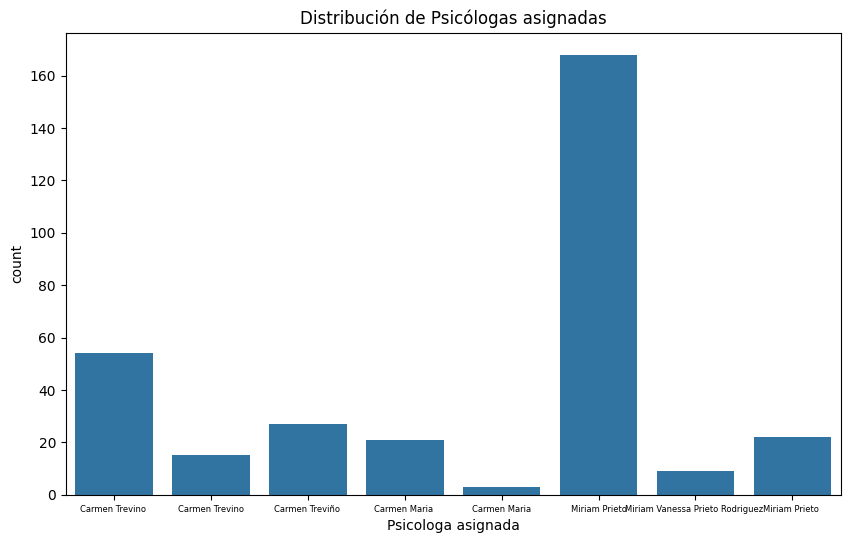

In [157]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Psicologa asignada')
plt.title('Distribución de Psicólogas asignadas')
plt.xticks(fontsize=6)  # Ajusta el tamaño de las etiquetas (ejemplo: 12)
plt.show()

In [155]:
print("\nTabla cruzada de 'Psicologa asignada' y 'Efectuada':")
pd.crosstab(df['Psicologa asignada'], df['Efectuada'])



Tabla cruzada de 'Psicologa asignada' y 'Efectuada':


Efectuada,0.0,1.0
Psicologa asignada,,
Carmen Maria,1,2
Carmen Maria,7,14
Carmen Trevino,2,13
Carmen Trevino,5,49
Carmen Treviño,8,19
Miriam Prieto,63,104
Miriam Prieto,5,7


/var/folders/20/32nt1tgd7dn17l8pghpkyhhc0000gn/T/ipykernel_4104/863204358.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_validas['Día de la semana'] = df_validas['Fecha agenda'].dt.day_name()


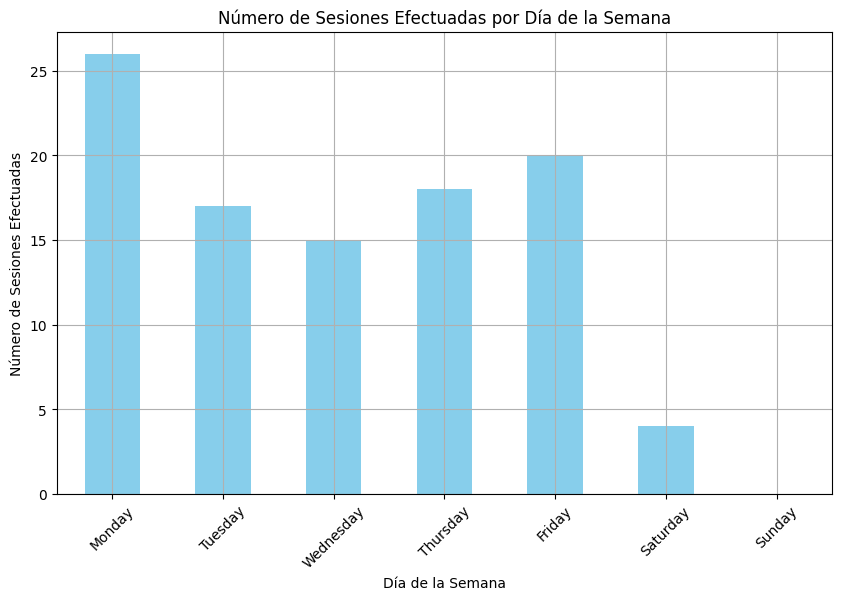

In [160]:
# Convertir a datetime, usando errors='coerce' para manejar valores no válidos
df['Fecha agenda'] = pd.to_datetime(df['Fecha agenda'], errors='coerce')

# Filtrar los registros donde 'Fecha agenda' no sea NaT (es decir, fechas válidas)
df_validas = df[df['Fecha agenda'].notna()]

# Extraer el día de la semana en formato textual (Lunes, Martes, etc.)
df_validas['Día de la semana'] = df_validas['Fecha agenda'].dt.day_name()

# Agrupar por el día de la semana y contar las sesiones efectuadas
sesiones_por_dia = df_validas.groupby('Día de la semana')['Efectuada'].sum()

# Ordenar los días de la semana en el orden correcto
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sesiones_por_dia = sesiones_por_dia.reindex(orden_dias)

# Graficar las sesiones efectuadas por día de la semana
plt.figure(figsize=(10, 6))
sesiones_por_dia.plot(kind='bar', color='skyblue')
plt.title('Número de Sesiones Efectuadas por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Sesiones Efectuadas')
plt.xticks(rotation=45)
plt.grid()
plt.show()



In [170]:
df.columns[7]

'Num. Sesión '

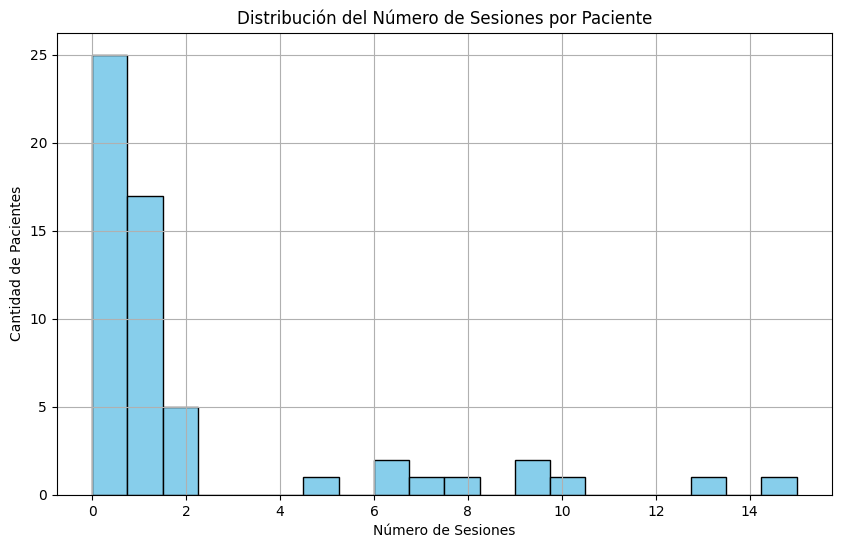

In [171]:
# Agrupar por paciente y contar el número de sesiones por cada paciente
sesiones_por_paciente = df.groupby('Paciente')[df.columns[7]].count()

# Visualizar con un histograma
plt.figure(figsize=(10, 6))
plt.hist(sesiones_por_paciente, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución del Número de Sesiones por Paciente')
plt.xlabel('Número de Sesiones')
plt.ylabel('Cantidad de Pacientes')
plt.grid(True)
plt.show()
